In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
import zipfile
with zipfile.ZipFile("archive (1).zip", "r") as zip_ref:
    zip_ref.extractall("destination_folder")

In [7]:
zip_file_name = "archive (1).zip"
destination_folder = "destination_folder"
with zipfile.ZipFile(zip_file_name, "r") as zip_ref:
    zip_ref.extractall(destination_folder)
import os
os.listdir(destination_folder)

['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']

Let's focus on 2015 data for visualization as it has many features in regards to happiness report.


In [12]:
df=pd.read_csv('2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [14]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

As no null values are found so we don't need to go with the procedure of filling missing values.

In [15]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [16]:
df.shape

(158, 12)

**DATA VISUALISATION**

Univariate analysis

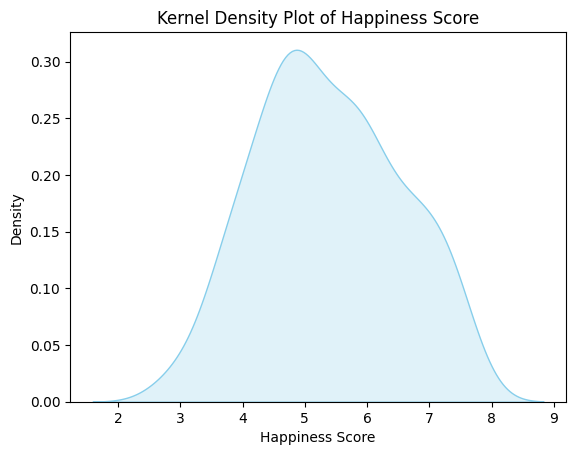

In [17]:
happiness_score = df['Happiness Score']

# Create a kernel density plot
sns.kdeplot(happiness_score, shade=True, color='skyblue')
plt.xlabel('Happiness Score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Happiness Score')
plt.show()

Counting countries on basis of region.

In [18]:
def plot_columnwise(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


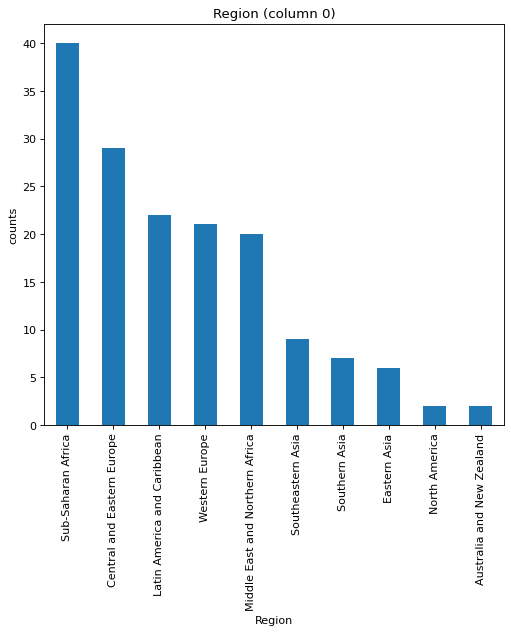

In [19]:
plot_columnwise(df,10, 5)

Correlational matrix

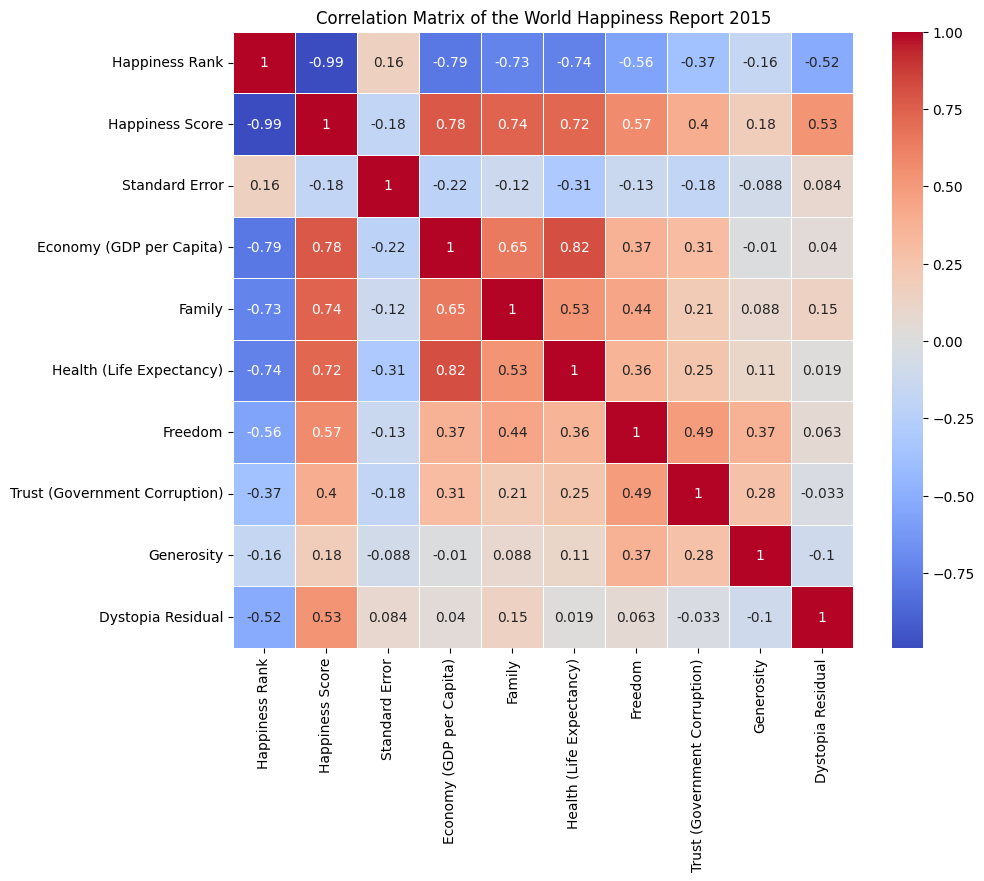

In [22]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of the World Happiness Report 2015')
plt.show()

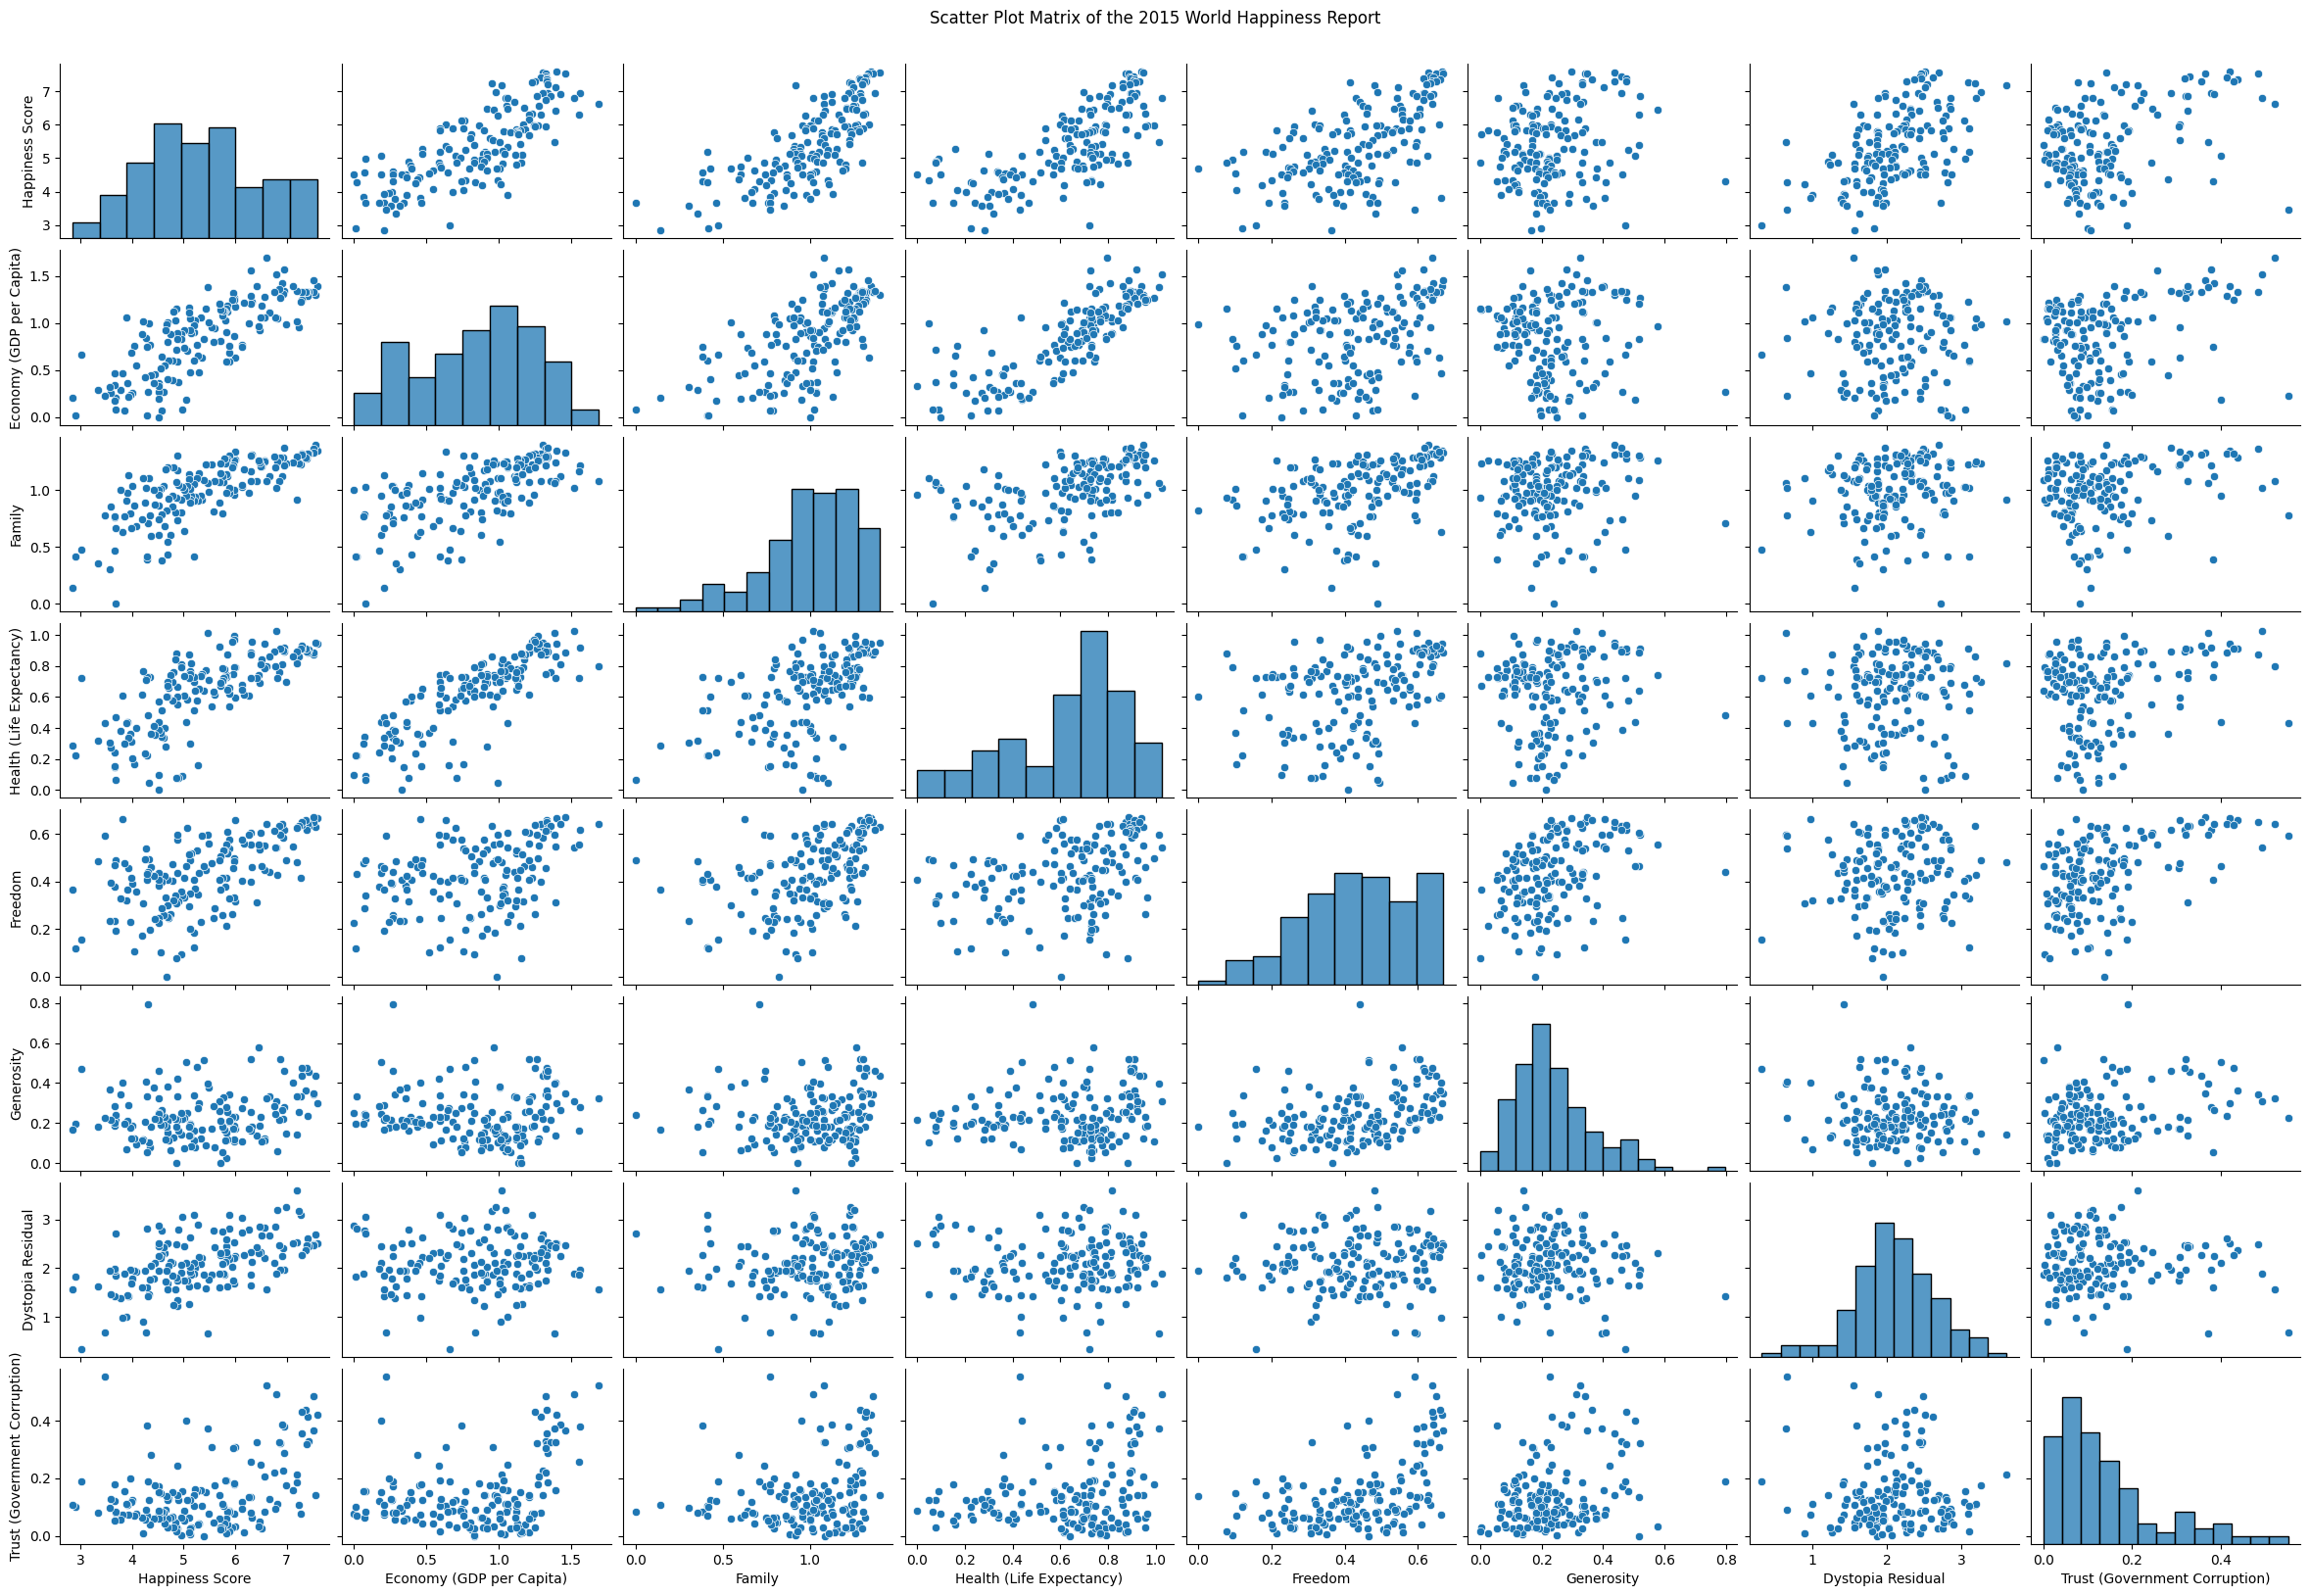

In [23]:
columns_to_include = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity','Dystopia Residual','Trust (Government Corruption)']

# Create a pairplot for the selected columns
sns.pairplot(df[columns_to_include], height=2, aspect=1.5)
plt.suptitle('Scatter Plot Matrix of the 2015 World Happiness Report', y=1.02)
plt.show()

Now 2016 data

In [25]:
df1=pd.read_csv('2016.csv')
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


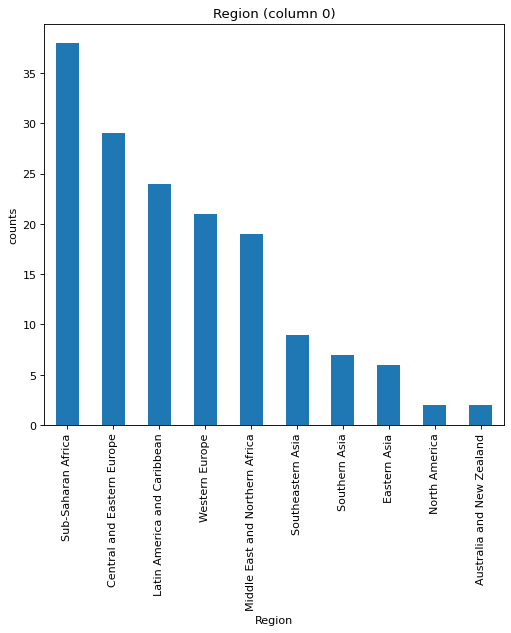

In [26]:
plot_columnwise(df1,10, 5)

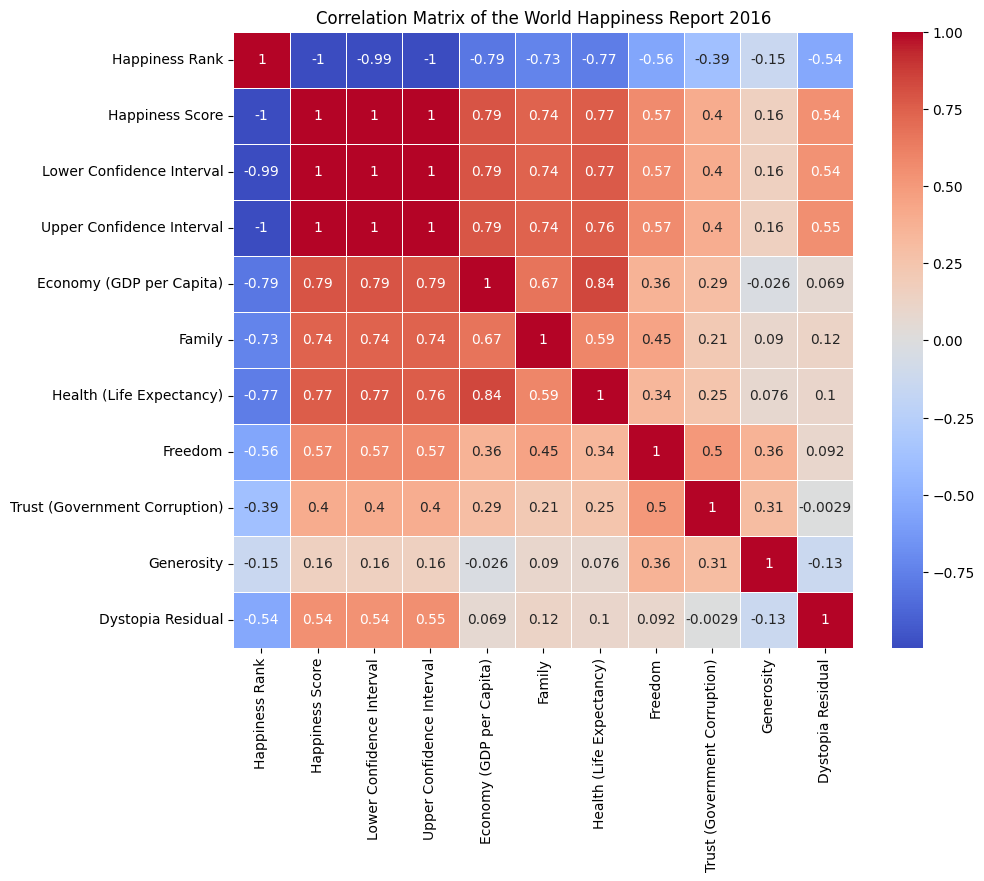

In [28]:
numeric_df1 = df1.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns in df1
correlation_matrix1 = numeric_df1.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of the World Happiness Report 2016')
plt.show()

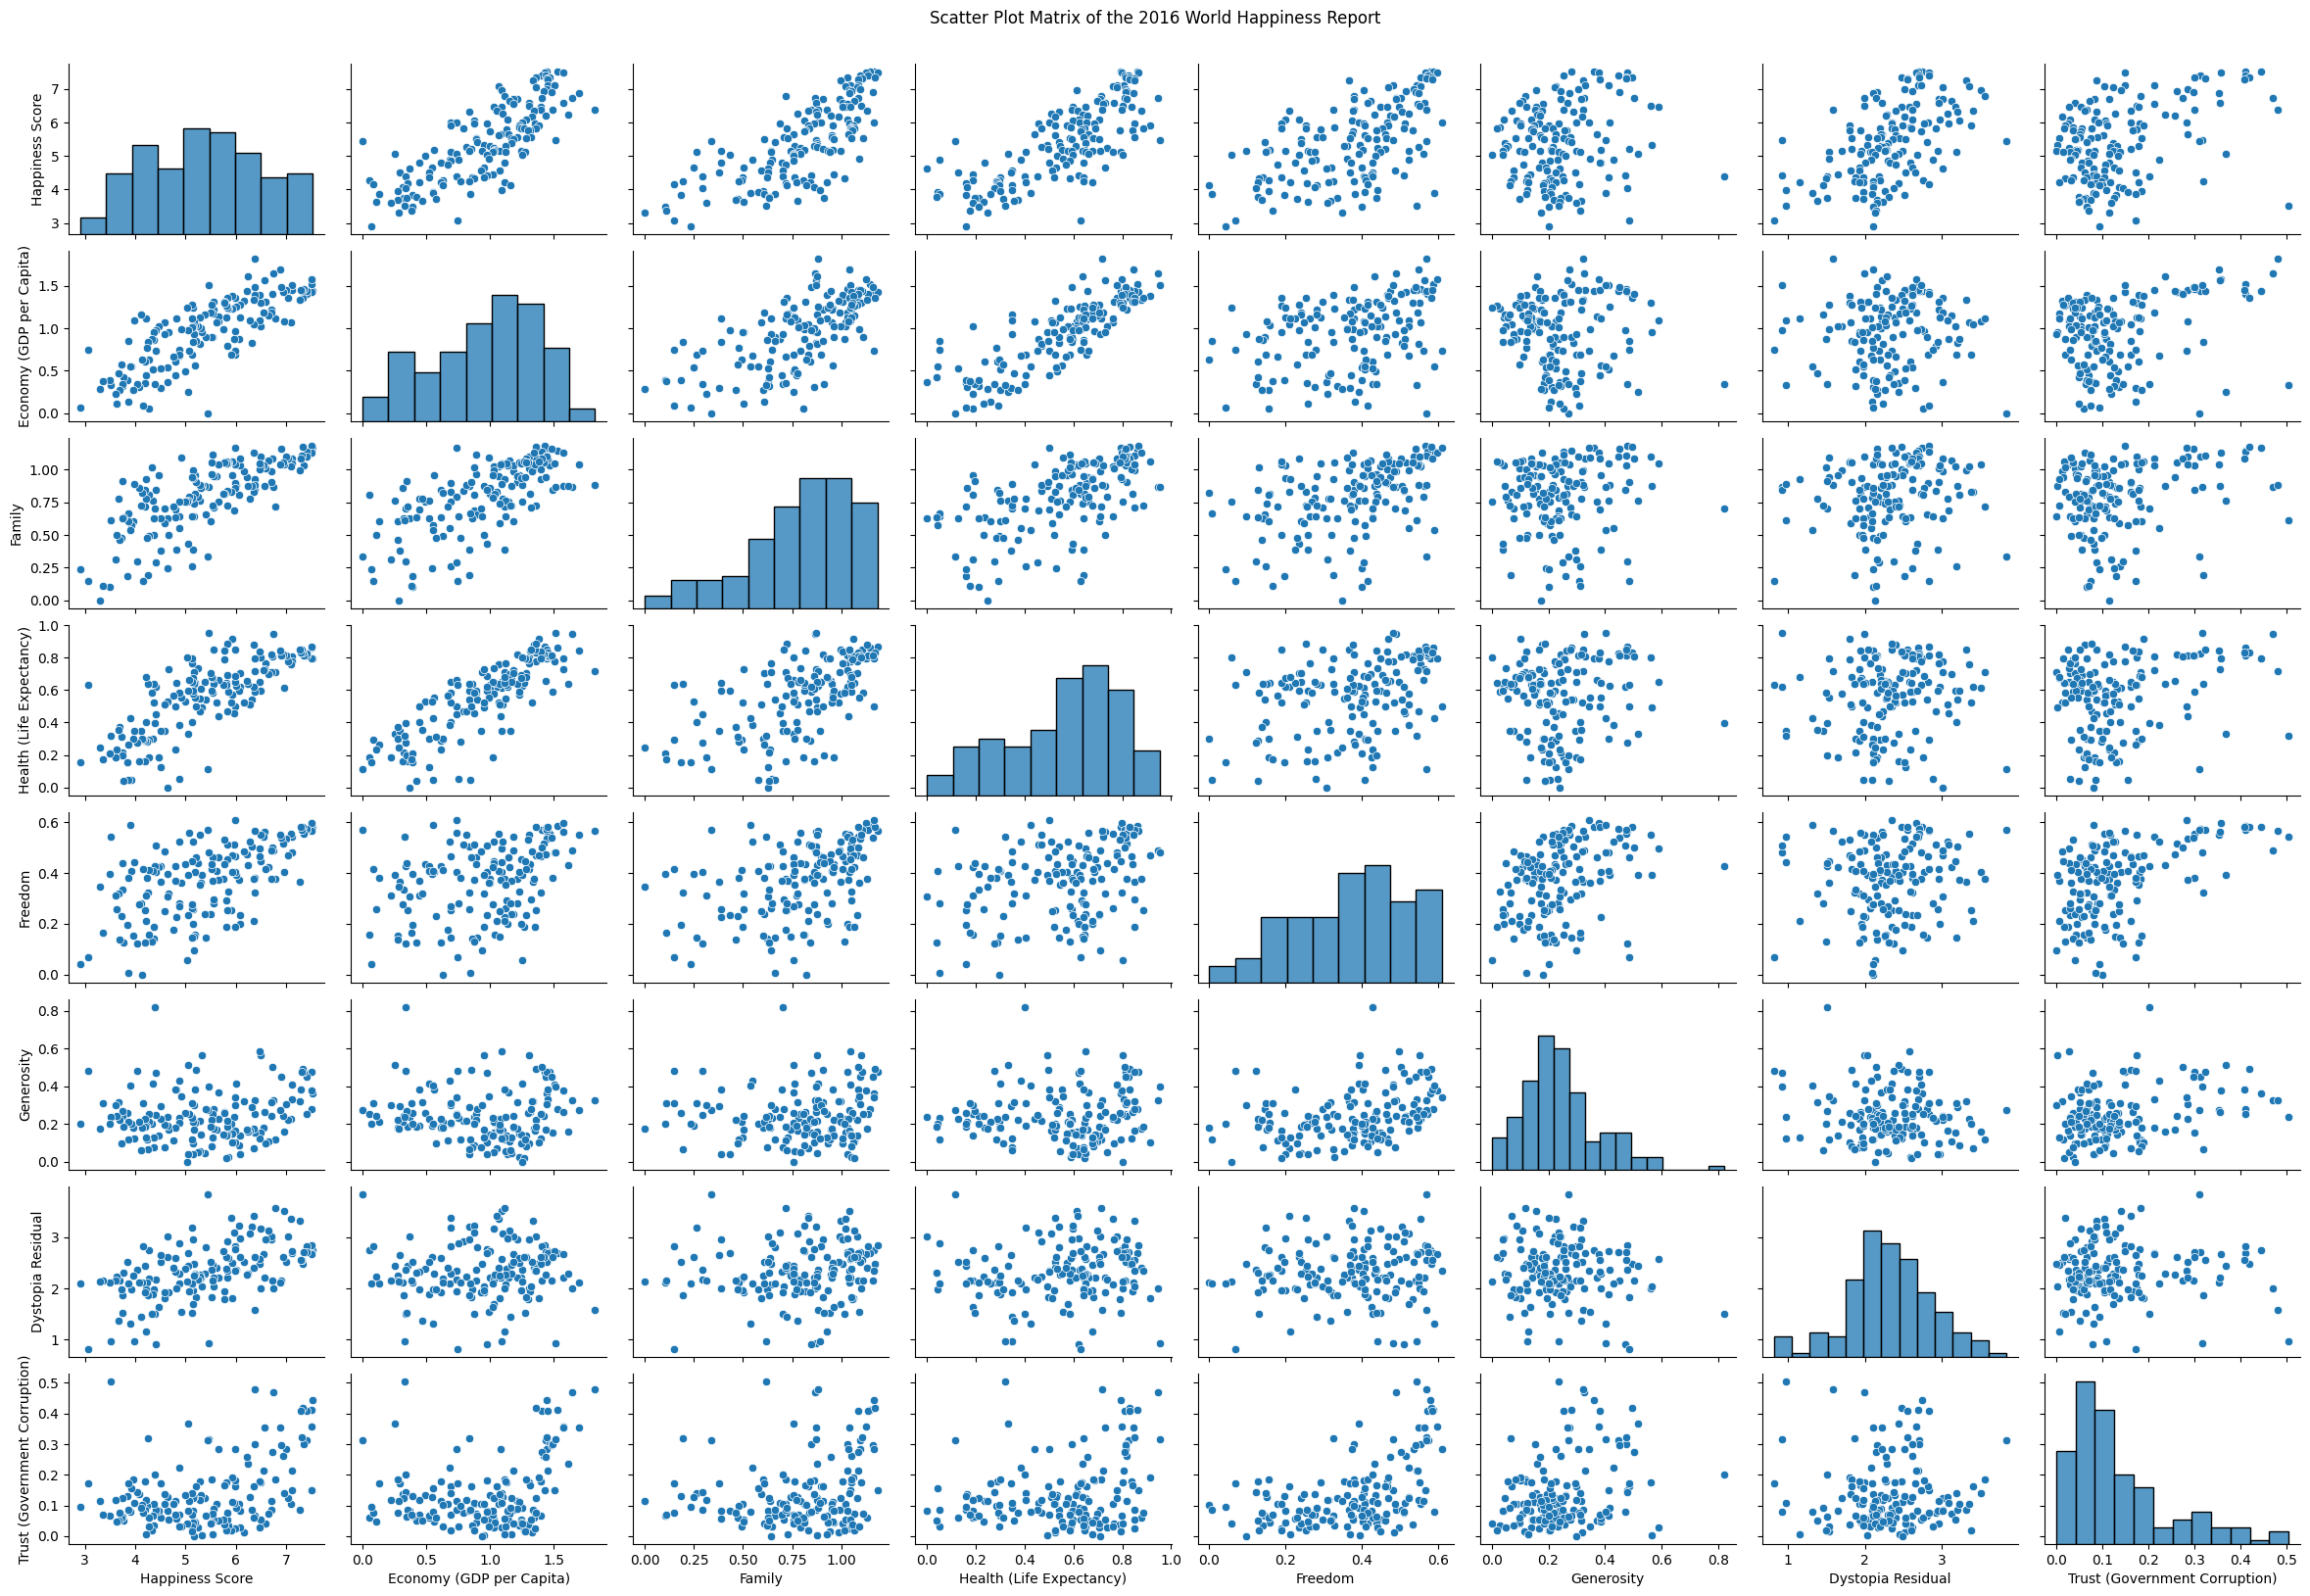

In [29]:
columns_to_include = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity','Dystopia Residual','Trust (Government Corruption)']

# Create a pairplot for the selected columns
sns.pairplot(df1[columns_to_include], height=2, aspect=1.5)
plt.suptitle('Scatter Plot Matrix of the 2016 World Happiness Report', y=1.02)
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Label Encoding

In [33]:
le=LabelEncoder()
df['Region']=le.fit_transform(df['Region'])
df['Country']=le.fit_transform(df['Country'])
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Removing outliners

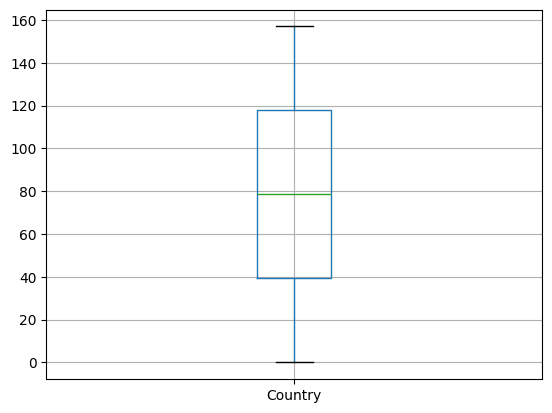

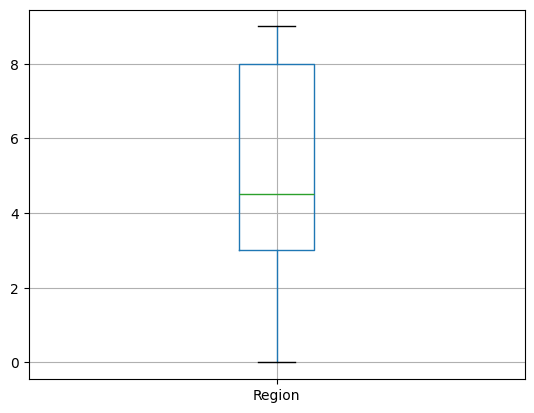

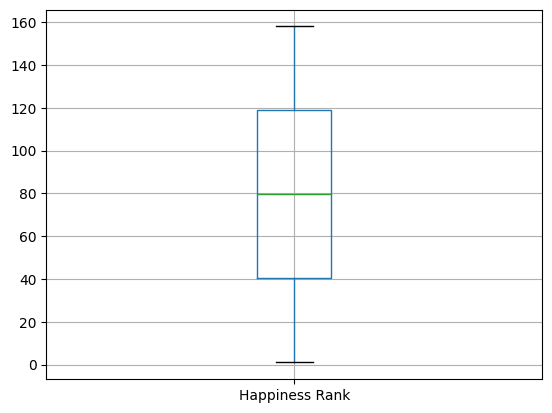

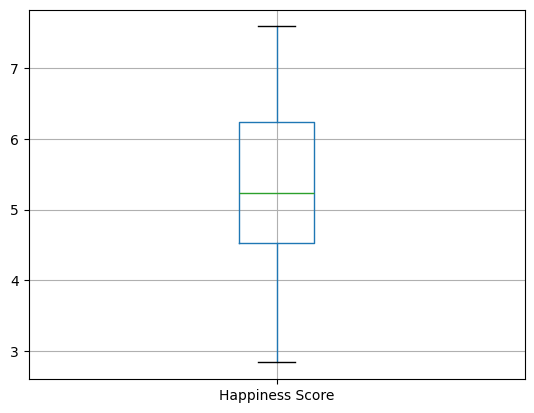

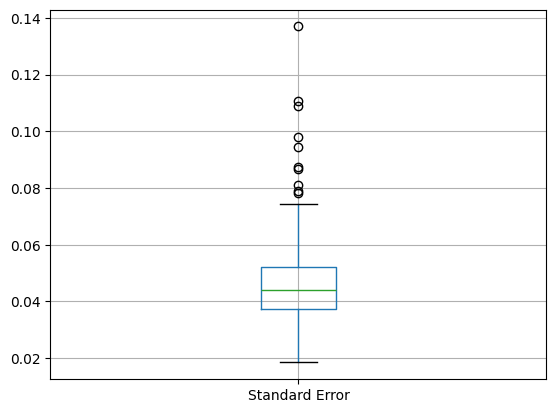

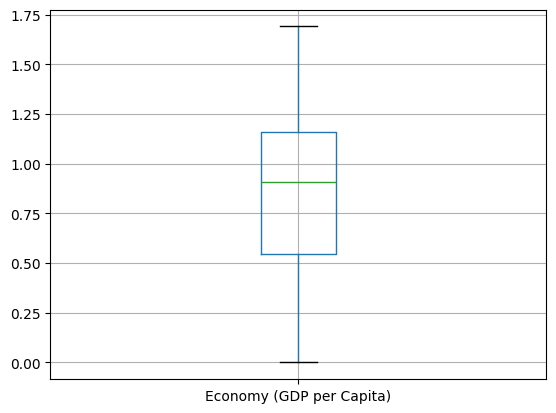

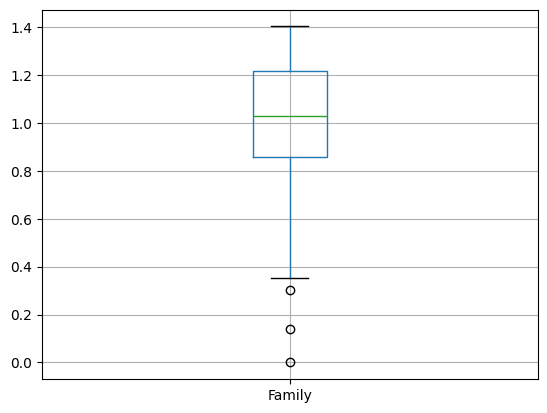

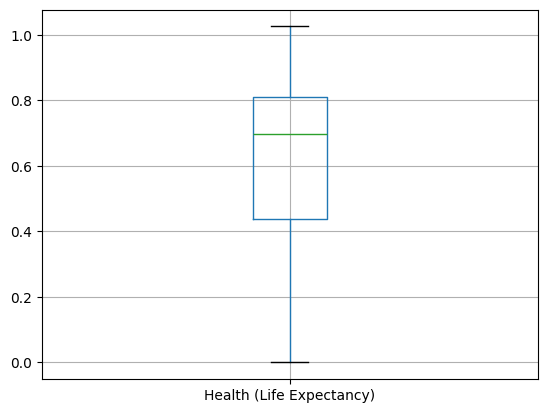

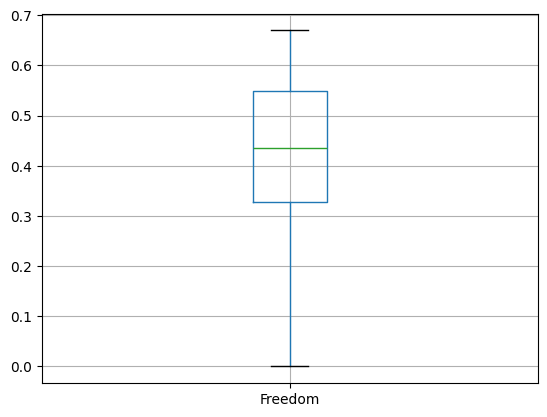

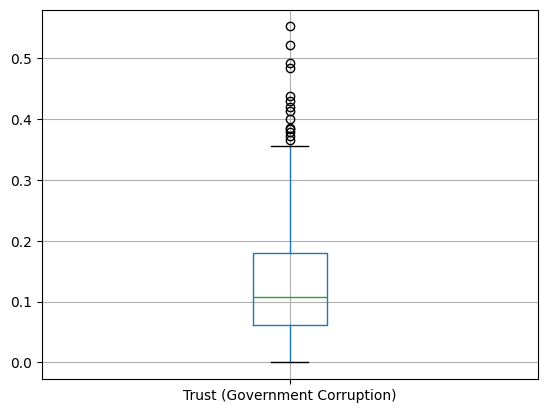

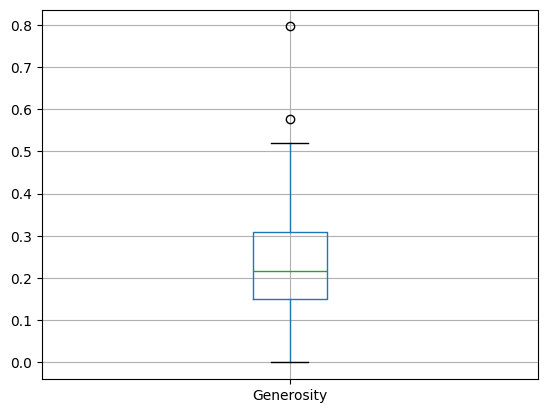

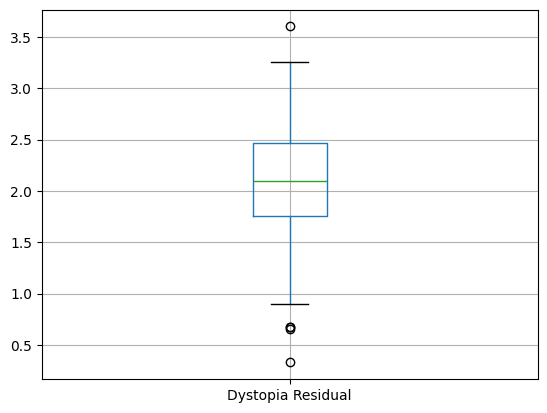

In [34]:
for i in df.columns:
  df[[i]].boxplot()
  plt.show()

In [35]:
from scipy import stats
z_threshold = 3
z_scores = stats.zscore(df.select_dtypes(include='number'))

outliers = (z_scores > z_threshold).any(axis=1)

cleaned_data = df[~outliers]
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


**Making ML Model**

In [36]:
x=df.drop("Happiness Score", axis=1)
y=df['Happiness Score']
x.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [37]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [41]:
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**1. Decision Tree Model**

In [42]:
dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [43]:
y_train_pred=dtr.predict(x_train)
y_test_pred=dtr.predict(x_test)

Accuracy test

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
r2_score(y_train,y_train_pred)*100

100.0

In [46]:
mean_squared_error(y_train,y_train_pred)

0.0

In [47]:
r2_score(y_test,y_test_pred)*100

99.63210564424688

In [48]:
mean_squared_error(y_test,y_test_pred)

0.004897354166666667

**2. Random Forest Model**

In [49]:
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)


RandomForestRegressor(random_state=42)

In [50]:
y_train_pred1=rfr.predict(x_train)
y_test_pred1=rfr.predict(x_test)

In [51]:
r2_score(y_train,y_train_pred1)*100

99.89758274219471

In [52]:
mean_squared_error(y_train,y_train_pred1)

0.0013077514981817905

In [53]:
r2_score(y_test,y_test_pred1)*100

99.51774792463739

In [54]:
mean_squared_error(y_test,y_test_pred1)

0.006419666879166671

**3. XG BOOST MODEL**

In [55]:
xg_reg=xgb.XGBRegressor()

In [56]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
y_train_pred2=xg_reg.predict(x_train)
y_test_pred2=xg_reg.predict(x_test)

In [58]:
r2_score(y_train,y_train_pred2)*100

99.99997581165692

In [59]:
mean_squared_error(y_train,y_train_pred2)

3.0885753602336115e-07

In [60]:
r2_score(y_test,y_test_pred2)*100

99.50165501621403

In [61]:
mean_squared_error(y_test,y_test_pred2)

0.006633893248471911

**4. Linear Regression**

In [62]:
reg=LinearRegression()

In [63]:
reg.fit(x_train,y_train)

LinearRegression()

In [64]:
y_train_pred3=reg.predict(x_train)
y_test_pred3=reg.predict(x_test)

In [65]:
r2_score(y_train,y_train_pred3)*100

99.99999426927577

In [66]:
mean_squared_error(y_train,y_train_pred3)

7.31748082121174e-08

In [67]:
r2_score(y_test,y_test_pred3)*100

99.99999416144894

In [68]:
mean_squared_error(y_test,y_test_pred3)

7.77219110920675e-08

From considering all the various types of models Random Forest is doing pretty well.

In [72]:
#Save the Best Model 
import pickle


best_model = rfr  
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
